In [2]:
# Install tf 2.0 preview GPU version
!pip install tensorflow-gpu==2.0.0-beta1 

     |████████████████████████████████| 348.9MB 43kB/s s eta 0:00:01��██████▌                   | 136.3MB 56.1MB/s eta 0:00:04
     |████████████████████████████████| 3.1MB 32.6MB/s eta 0:00:01
     |████████████████████████████████| 501kB 34.5MB/s eta 0:00:01


In [3]:
# Common Imports
import os                                   # For os commands (dir cwd etc)
import zipfile                              # for extracting data set files
                                 
import skimage                              # for scikit-learn image operations
from matplotlib import pyplot as plt        # for visualizing data
import numpy as np                          # for numerical python
import random                               # for random sampling in range(),number_of_values

import tensorflow as tf


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
print(tf.test.gpu_device_name())
print(tf.version)

/device:GPU:0
<module 'tensorflow._api.v2.version' from '/opt/conda/lib/python3.6/site-packages/tensorflow/_api/v2/version/__init__.py'>


**CHANGE WORKING DIRECTORY TO UPLOADED FILES**

---

In [5]:
print(os.getcwd())
print(os.listdir())

/kaggle/working
['__notebook_source__.ipynb', '.ipynb_checkpoints']


In [6]:
DATASET_PATH = "../input/belgiumts-dataset/"
os.chdir(DATASET_PATH)
print(os.getcwd())
print(os.listdir())

/kaggle/input/belgiumts-dataset
['BelgiumTSC_Testing', 'BelgiumTSC_Training']


Loading Data into Python

In [7]:
def load_images(data_directory):
  
  # lists to store Images and labels
  images = []
  labels = []
  log_index = 0
  # get list of all directories present in the data_directory path
  directories = [dir for dir in os.listdir(data_directory)
                 if os.path.isdir(os.path.join(data_directory,dir))] # to make sure that we include only directories and not any files present in the folder
  print(len(directories))
  for dir in directories:
    current_directory = os.path.join(data_directory,dir)
    # Gather all fileNames in the given directory to load images into images array using sklearn
    file_names = [os.path.join(current_directory,file) 
                  for file in os.listdir(current_directory)
                  if file.endswith('.ppm')
                 ]
    
    # Load all given Images into the Images array
    for file in file_names:
      images.append(skimage.data.imread(file))
      labels.append(int(dir))
      log_index+=1
      # print('Loading File: {0}'.format(log_index))
  print('Successfully Loadded  {0} images!'.format(len(images)))
  return np.array(images),np.array(labels)





In [8]:
# LOAD IMAGES 
  
ROOT_PATH = os.getcwd()  
TRAININ_DATA_PATH = ROOT_PATH + '/BelgiumTSC_Training/Training'  
TEST_DATA_PATH = ROOT_PATH + '/BelgiumTSC_Testing/Testing'
  
training_images, training_labels = load_images(TRAININ_DATA_PATH)
print('Training Data Sucessfully Loaded!!')
testing_images,testing_labels = load_images(TEST_DATA_PATH)
print('Test data sucessfully loaded!!')


62
Successfully Loadded  4575 images!
Training Data Sucessfully Loaded!!
62
Successfully Loadded  2520 images!
Test data sucessfully loaded!!


**To Verify and get some facts about our Data**

In [9]:
index = 1                          # Replace the index to check out the shape of input images
print('Dimension of Image at index ' + str(index) + ':', training_images[index].shape)  
print('Number of training Images :' , training_images.size)
print('Number of Dimensions of Images array : ',training_images.ndim)                 # ndims - number of dimensions for np array images

print('Dimensions for labels :', training_labels.shape)
print('Label for Image at index ' + str(index) +': ',training_labels[index])
print('Number of Classes : ',len(set(training_labels)))

print('Some additional tidbits about the memory requirements of data ')
print('Size of an individual image: ' ,training_images.itemsize)

Dimension of Image at index 1: (218, 238, 3)
Number of training Images : 4575
Number of Dimensions of Images array :  1
Dimensions for labels : (4575,)
Label for Image at index 1:  15
Number of Classes :  62
Some additional tidbits about the memory requirements of data 
Size of an individual image:  8


### Lets split these into 2 sets Validation and testing  with approx 1500 images for validation and 2000 for testing 


In [10]:
def transform_images(images,height,width):
  transformed_images = [skimage.transform.resize(image,(height,width)) for image in images]
  return  np.array(transformed_images)


### TEST FOR STRATIFIED SPLIT 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
print(training_images[0].shape)
print(training_images.size)
full_data = np.append(training_images,testing_images)
full_labels = np.append(training_labels,testing_labels)
print('Collated Image Data size :',full_data.shape)
print('Collated Image Labels size :',full_labels.shape)

(199, 206, 3)
4575
Collated Image Data size : (7095,)
Collated Image Labels size : (7095,)


In [48]:
train_images_split,test_images_split,train_labels_split,test_labels_split = train_test_split(full_data,full_labels,stratify= full_labels,test_size = 0.2)
print('Train Image Split dims: ',train_images_split.size)
print('Train Labels Split dims: ',train_labels_split.size)
print('Test Image Split dims: ',test_images_split.size)
print('Test Labels Split dims: ',test_labels_split.size)

Train Image Split dims:  5676
Train Labels Split dims:  5676
Test Image Split dims:  1419
Test Labels Split dims:  1419


#### Further split training data for Validation data

In [49]:
train_images_split,val_images_split,train_labels_split,val_labels_split = train_test_split(train_images_split,train_labels_split,stratify= train_labels_split,test_size = 0.2)
print('Train Image Split dims: ',train_images_split.size)
print('Train Labels Split dims: ',train_labels_split.size)
print('Test Image Split dims: ',val_images_split.size)
print('Test Labels Split dims: ',val_labels_split.size)

Train Image Split dims:  4540
Train Labels Split dims:  4540
Test Image Split dims:  1136
Test Labels Split dims:  1136


In [55]:
train_split_images = transform_images(train_images_split,128,128)
test_split_images = transform_images(test_images_split,128,128)
val_split_images = transform_images(val_images_split,128,128)

print('Finished Trasforming Images for Train,Test and Validation Sets')

Finished Trasforming Images for Train,Test and Validation Sets


Now we have our basic image sets ready. All we need to do is Transform them to appropriate sizes before trying out the model.

Training Set (128x128)--  train_split_images , train_labels_split  

Testing Set  --  test_split_images, test_labels_split

Validation Set --  val_split_images,val_labels_split

In [11]:
print('Number of Testing Images: ',testing_images.shape[0])
# Lets split these into 2 sets Validation and testing  with approx 1500 images for validation and 2000 for testing
index_list = np.arange(len(testing_images))
idx = np.random.choice(index_list, 1500, replace=False)
otheridx = [ indices for indices in index_list  if indices not in idx]

validation_images = testing_images[idx]
validation_labels = testing_labels[idx]

final_testing_images = testing_images[otheridx]
final_testing_labels = testing_labels[otheridx]



print('Final Split Validation Images : ',validation_images.shape[0])
print('Final Split Testing Images : ',final_testing_images.shape[0])

training_images128 = transform_images(training_images,128,128)
validation_images128 = transform_images(validation_images,128,128)
testing_images128 = transform_images(final_testing_images,128,128)


Number of Testing Images:  2520
Final Split Validation Images :  1500
Final Split Testing Images :  1020



Now we have our basic image sets ready. All we need to do is Transform them to appropriate sizes before trying out the model.

Training Set --  training_images , training_labels  
Training set 128x128   -- training_images128

Testing Set  --  final_testing_images, final_testing_labels

Validation Set --  validation_images,validation_labels


### Visualize our data

In [12]:
def show_images_of_all_classes(train_images,training_labels):
  num_cols =  8
  classes = len(set(training_labels))
  if classes % num_cols == 0:
      num_rows =  classes / num_cols
  else:
      num_rows = int(classes / num_cols) + 1
  plt.figure(figsize=(15,15))
  i = 1
  for class_number in range(0,classes):
    
    indices = np.where(training_labels == class_number)
    plt.subplot(num_rows,num_cols, i)
    i += 1
    plt.axis('off')
    plt.imshow(train_images[indices[0][1]])
    plt.title('Class :{0} [{1}] '.format(class_number,len(indices[0])))   #np.count_nonzero(labels == labels[index])))
  plt.show()


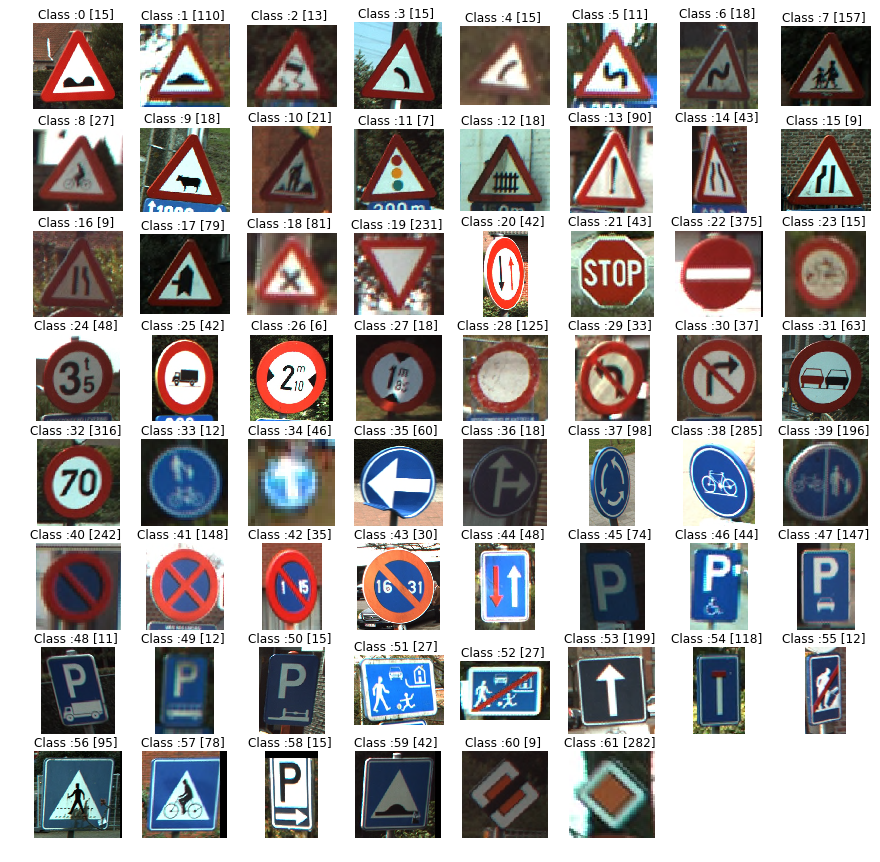

In [13]:
show_images_of_all_classes(training_images,training_labels)

### FINAL LABELS DICTIONARY

In [50]:
# Create a dictionary with Class Names
classnames = {
              0 : 'Warning for a bad road surface',
              1 : 'Warning for a speed bump',
              2 : 'Warning for a slippery road surface',
              3 : 'Warning for a curve to the left',
              4 : 'Warning for a curve to the right',
              5 : 'Warning for a double curve, first left then right',                                                    # Merge Classes 5 & 6 later
              6 : 'Warning for a double curve, first left then right',
              7 : 'Watch out for children ahead',
              8 : 'Watch out for  cyclists',
              9 : 'Watch out for cattle on the road',
              10: 'Watch out for roadwork ahead',
              11: 'Traffic light ahead',
              12: 'Watch out for railroad crossing with barriers ahead',
              13: 'Watch out ahead for unknown danger',
              14: 'Warning for a road narrowing',
              15: 'Warning for a road narrowing on the left',
              16: 'Warning for a road narrowing on the right',
              17: 'Warning for side road on the right',
              18: 'Warning for an uncontrolled crossroad',
              19: 'Give way to all drivers',
              20: 'Road narrowing, give way to oncoming drivers',
              21: 'Stop and give way to all drivers',
              22: 'Entry prohibited (road with one-way traffic)',
              23: 'Cyclists prohibited',
              24: 'Vehicles heavier than indicated prohibited',
              25: 'Trucks prohibited',
              26: 'Vehicles wider than indicated prohibited',
              27: 'Vehicles higher than indicated prohibited',
              28: 'Entry prohibited',
              29: 'Turning left prohibited',
              30: 'Turning right prohibited',
              31: 'Overtaking prohibited',
              32: 'Driving faster than indicated prohibited (speed limit)',
              33: 'Mandatory shared path for pedestrians and cyclists',
              34: 'Driving straight ahead mandatory',
              35: 'Mandatory left',
              36: 'Driving straight ahead or turning right mandatory',
              37: 'Mandatory direction of the roundabout',
              38: 'Mandatory path for cyclists',
              39: 'Mandatory divided path for pedestrians and cyclists',
              40: 'Parking prohibited',
              41: 'Parking and stopping prohibited',
              42: '',
              43: '',
              44: 'Road narrowing, oncoming drivers have to give way',
              45: 'Parking is allowed',
              46: 'parking for handicapped',
              47: 'Parking for motor cars',
              48: 'Parking for goods vehicles',
              49: 'Parking for buses',
              50: 'Parking only allowed on the sidewalk',
              51: 'Begin of a residential area',
              52: 'End of the residential area',
              53: 'Road with one-way traffic',
              54: 'Dead end street',
              55: '', 
              56: 'Crossing for pedestrians',
              57: 'Crossing for cyclists',
              58: 'Parking exit',
              59: 'Information Sign : Speed bump',
              60: 'End of the priority road',
              61: 'Begin of a priority road'
    }

### Image Augmentation

Keras provides a handy api to do various operations on our input images before passing them to the model.
These changes range from cropping the image to flipping it and even providing shearing effects......

So Let's look at how it looks in action:

In [57]:
# Training Data Generator

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.25,fill_mode='nearest')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [58]:
# Ready our generators for passing into models 
train_generator = training_datagen.flow(train_split_images,train_labels_split,batch_size=32)

validation_generator = validation_datagen.flow(val_split_images,val_labels_split,batch_size=32)


Labels: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32]


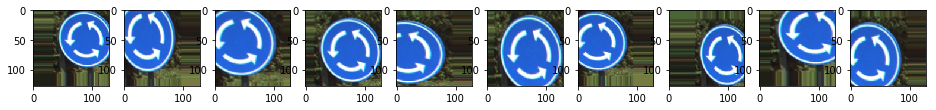

In [59]:
# A little test
# try and visualize your images

nyan_generator = training_datagen.flow(train_split_images[1:2], train_labels_split[110:111],batch_size=1)

sign = [next(nyan_generator) for i in range(0,10)]
fig, ax = plt.subplots(1,10, figsize=(16, 6))
print('Labels:', [item[1][0] for item in sign])
l = [ax[i].imshow(sign[i][0][0]) for i in range(0,10)]

# Define Convolutional Network

In [60]:
def conv_net(train_images_dims,num_of_classes,filter_size = 2,num_convolutions=64,num_strides=2):
  # pre process image dimensions
  if (len(train_images_dims) == 3):    # Channel Last
    train_images_dims = (train_images_dims[1],train_images_dims[2])   
  elif (len(train_images_dims) == 4):
    train_images_dims = (train_images_dims[1],train_images_dims[2],train_images_dims[3])
  
  model  = tf.keras.Sequential()
  
  #Conv1
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu',input_shape= train_images_dims))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
    
  #Conv2
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv3
  model.add(tf.keras.layers.Conv2D(int(num_convolutions/2),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
    
  #Conv4
  model.add(tf.keras.layers.Conv2D(int(num_convolutions/2),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv5
  model.add(tf.keras.layers.Conv2D(int(num_convolutions/2),(filter_size,filter_size),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
  
  #Flatten and add Dense Layer
  model.add(tf.keras.layers.Flatten())
  #Dense 1
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  #Dense 2
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  
  #Output Layer
  model.add(tf.keras.layers.Dense(num_of_classes,activation = 'softmax'))
  return model

## Define Callback

In [61]:
monitor = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights = True, min_delta = 0.001)

In [62]:
model_regularized = conv_net(train_split_images.shape,len(set(train_labels_split)),filter_size=2,num_convolutions=512)

In [63]:
model_regularized.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model_regularized.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 127, 127, 512)     6656      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 512)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 512)       1049088   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 512)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 256)       524544    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 256)      

In [ ]:
history = model_regularized.fit_generator(train_generator, validation_data=validation_generator,steps_per_epoch=(len(training_images128) / 32),epochs = 50,verbose=1,callbacks=[monitor])  # 32 = batch size

Epoch 1/50
143/142 [==============================] - 34s 240ms/step - loss: 3.6691 - accuracy: 0.1004 - val_loss: 3.3502 - val_accuracy: 0.1787
Epoch 2/50
143/142 [==============================] - 32s 226ms/step - loss: 3.1442 - accuracy: 0.1815 - val_loss: 2.7278 - val_accuracy: 0.2702
Epoch 3/50
143/142 [==============================] - 33s 228ms/step - loss: 2.5430 - accuracy: 0.3200 - val_loss: 1.9416 - val_accuracy: 0.4129
Epoch 4/50
143/142 [==============================] - 33s 228ms/step - loss: 2.0514 - accuracy: 0.4116 - val_loss: 1.5612 - val_accuracy: 0.5123
Epoch 5/50
143/142 [==============================] - 33s 228ms/step - loss: 1.7811 - accuracy: 0.4797 - val_loss: 1.3037 - val_accuracy: 0.6127
Epoch 6/50
143/142 [==============================] - 33s 228ms/step - loss: 1.5829 - accuracy: 0.5278 - val_loss: 1.1799 - val_accuracy: 0.6276
Epoch 7/50
 26/142 [====>.........................] - ETA: 24s - loss: 1.5398 - accuracy: 0.5565

### Visualize the losses

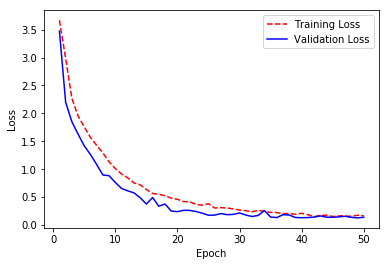

In [25]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
#history = model_regularized.fit_generator(train_generator, validation_data=validation_generator,steps_per_epoch=(len(training_images128) / 32),epochs = 30,verbose=1)  # 32 = batch size

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [26]:
model_regularized.evaluate(testing_images128,final_testing_labels)

1020/1020 [==============================] - 2s 2ms/sample - loss: 0.1693 - accuracy: 0.9510


[0.16929750162942617, 0.95098037]